# 그래요 다시 한번 회귀분석을 해봅시다!

### 파이썬 패키지를 이용한 회귀분석을 진행해봅시다

#### 시간대는 0-23시까지 나누지말고, 범주형으로 3개 카테고리로 나눠보자 / (아침점심 / 저녁 / 야식)




# 주희 : 전진선택법, 후진선택법으로 변수를 찾아보자

In [18]:
# 모듈설치 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from matplotlib import font_manager, rc
font_path = "./data/THEdog.ttf"   #폰트파일의 위치
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)
import warnings
warnings.filterwarnings("ignore")


In [19]:
# 데이터 불러오기

df = pd.read_excel('./data/delivery/회귀분석데이터.xlsx')
display(df)

,Unnamed: 0,날짜,시간,시,구,평균시간,주문건수,평균주문금액,5세단위구분,총인구수,남성인구수,여성인구수
0,0,2019-07-18,0,서울특별시,구로구,22.65,16,23679,20-24세,24384,12039,12345
1,1,2019-07-18,1,서울특별시,구로구,28.09,6,19667,20-24세,24384,12039,12345
2,2,2019-07-18,9,서울특별시,구로구,20.25,3,15167,20-24세,24384,12039,12345
3,3,2019-07-18,10,서울특별시,구로구,21.37,21,14721,20-24세,24384,12039,12345
4,4,2019-07-18,11,서울특별시,구로구,22.12,73,24563,20-24세,24384,12039,12345
...,...,...,...,...,...,...,...,...,...,...,...,...
55610,55610,2020-06-29,15,서울특별시,서대문구,123.20,1,29000,20-24세,23011,10555,12456
55611,55611,2020-06-29,16,서울특별시,서대문구,17.39,3,18900,20-24세,23011,10555,12456
55612,55612,2020-06-30,21,서울특별시,서대문구,91.18,1,14000,20-24세,23011,10555,12456
55613,55613,2020-06-30,22,서울특별시,서대문구,32.67,1,13700,20-24세,23011,10555,12456


In [20]:
# 시간을 카테고리로 바꿔봅시다
normal_time = [3,4,5,6,7,8,9,10,11,12,13,14,15,16]
dinner_time = [17,18,19,20,21]
midnight_time = [22,23,0,1,2]

new_list = []

# a = "normal_time"
# b = "dinner_time"
# c = "midnight_time"

a = "주간"; b = "저녁"; c = "야식"

for x in range(len(df)):
    sample = df.iloc[x,2]
    
    if sample in normal_time :
        new_list.append(a)

    if sample in dinner_time :
        new_list.append(b)

    if sample in midnight_time :
        new_list.append(c)

df['시간범주'] = new_list

df.head()

,Unnamed: 0,날짜,시간,시,구,평균시간,주문건수,평균주문금액,5세단위구분,총인구수,남성인구수,여성인구수,시간범주
0,0,2019-07-18,0,서울특별시,구로구,22.65,16,23679,20-24세,24384,12039,12345,야식
1,1,2019-07-18,1,서울특별시,구로구,28.09,6,19667,20-24세,24384,12039,12345,야식
2,2,2019-07-18,9,서울특별시,구로구,20.25,3,15167,20-24세,24384,12039,12345,주간
3,3,2019-07-18,10,서울특별시,구로구,21.37,21,14721,20-24세,24384,12039,12345,주간
4,4,2019-07-18,11,서울특별시,구로구,22.12,73,24563,20-24세,24384,12039,12345,주간


In [21]:
df.to_excel("./data/delivery/재환배달데이터.xlsx")

In [4]:
# 날짜컬럼을 시계열데이터로 변환 --> 요일별 추출해보자
df['타임테이블'] = pd.to_datetime(df['날짜'])
df['요일'] = df['타임테이블'].dt.weekday


In [5]:
df.info()
display(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55615 entries, 0 to 55614
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Unnamed: 0  55615 non-null  int64         
 1   날짜          55615 non-null  object        
 2   시간          55615 non-null  int64         
 3   시           55615 non-null  object        
 4   구           55615 non-null  object        
 5   평균시간        55615 non-null  float64       
 6   주문건수        55615 non-null  int64         
 7   평균주문금액      55615 non-null  int64         
 8   5세단위구분      55615 non-null  object        
 9   총인구수        55615 non-null  int64         
 10  남성인구수       55615 non-null  int64         
 11  여성인구수       55615 non-null  int64         
 12  시간범주        55615 non-null  int64         
 13  타임테이블       55615 non-null  datetime64[ns]
 14  요일          55615 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(9), object(4)
memory usage: 6.

,Unnamed: 0,날짜,시간,시,구,평균시간,주문건수,평균주문금액,5세단위구분,총인구수,남성인구수,여성인구수,시간범주,타임테이블,요일
0,0,2019-07-18,0,서울특별시,구로구,22.65,16,23679,20-24세,24384,12039,12345,2,2019-07-18,3
1,1,2019-07-18,1,서울특별시,구로구,28.09,6,19667,20-24세,24384,12039,12345,2,2019-07-18,3
2,2,2019-07-18,9,서울특별시,구로구,20.25,3,15167,20-24세,24384,12039,12345,0,2019-07-18,3
3,3,2019-07-18,10,서울특별시,구로구,21.37,21,14721,20-24세,24384,12039,12345,0,2019-07-18,3
4,4,2019-07-18,11,서울특별시,구로구,22.12,73,24563,20-24세,24384,12039,12345,0,2019-07-18,3


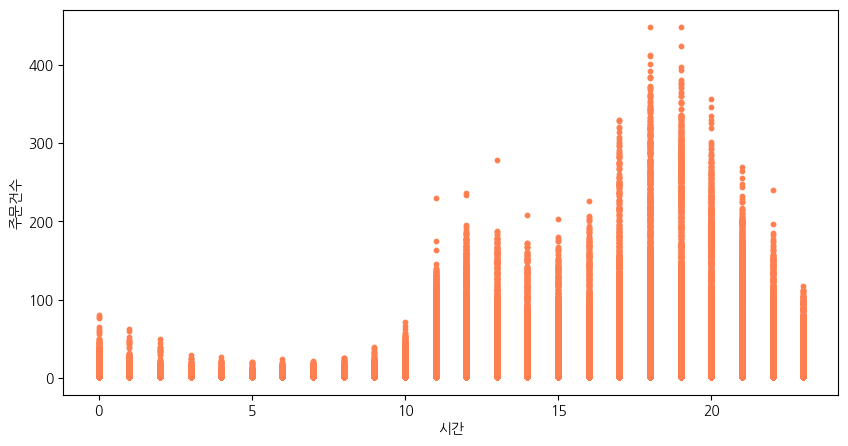

In [6]:
# 시간범주를 산점도로 그려보자

plt.style.use('default')
df.plot(kind='scatter', x='시간', y='주문건수', c='coral', s=10, figsize=(10,5))
plt.show()


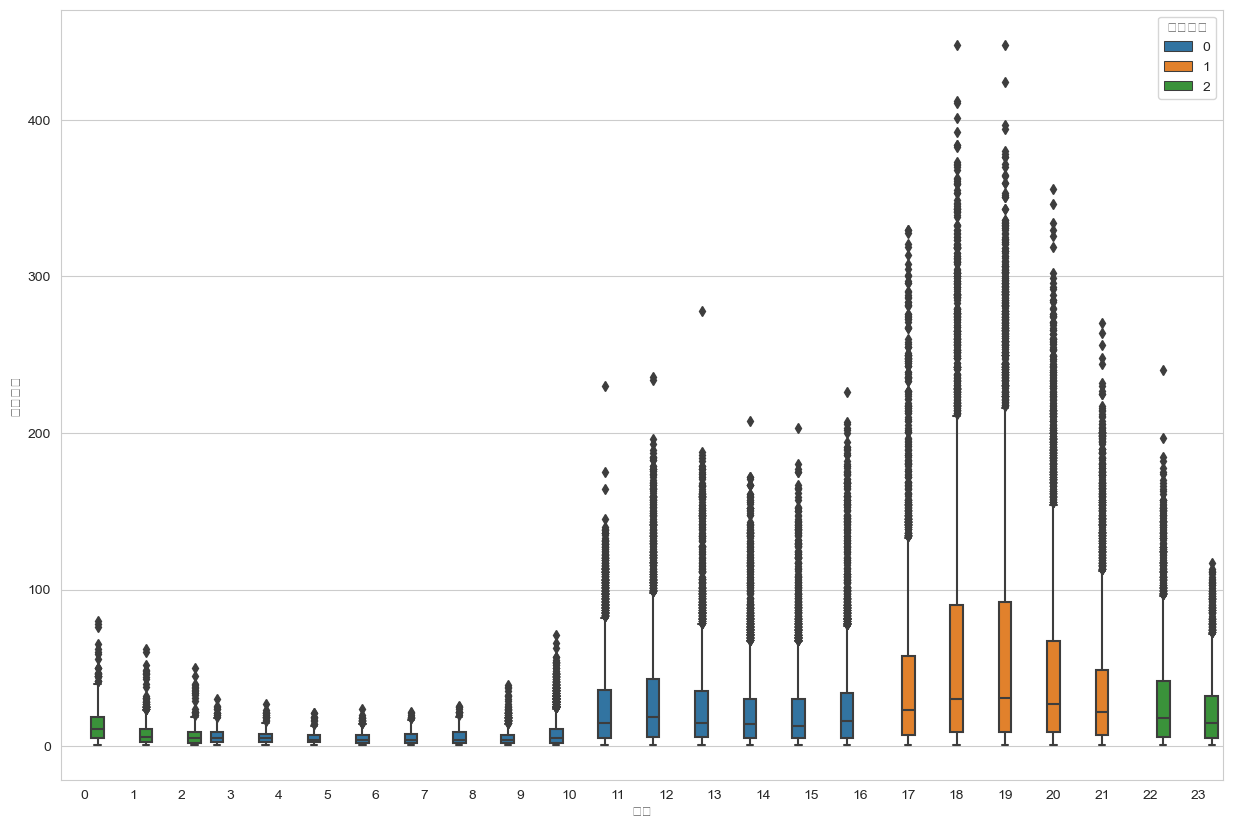

In [7]:
# 박스 그래프로 그려보자

sns.set_style('whitegrid')
fig = plt.figure(figsize=(15,10))
sns.boxplot(x='시간', y='주문건수', hue='시간범주', data=df)

plt.show()

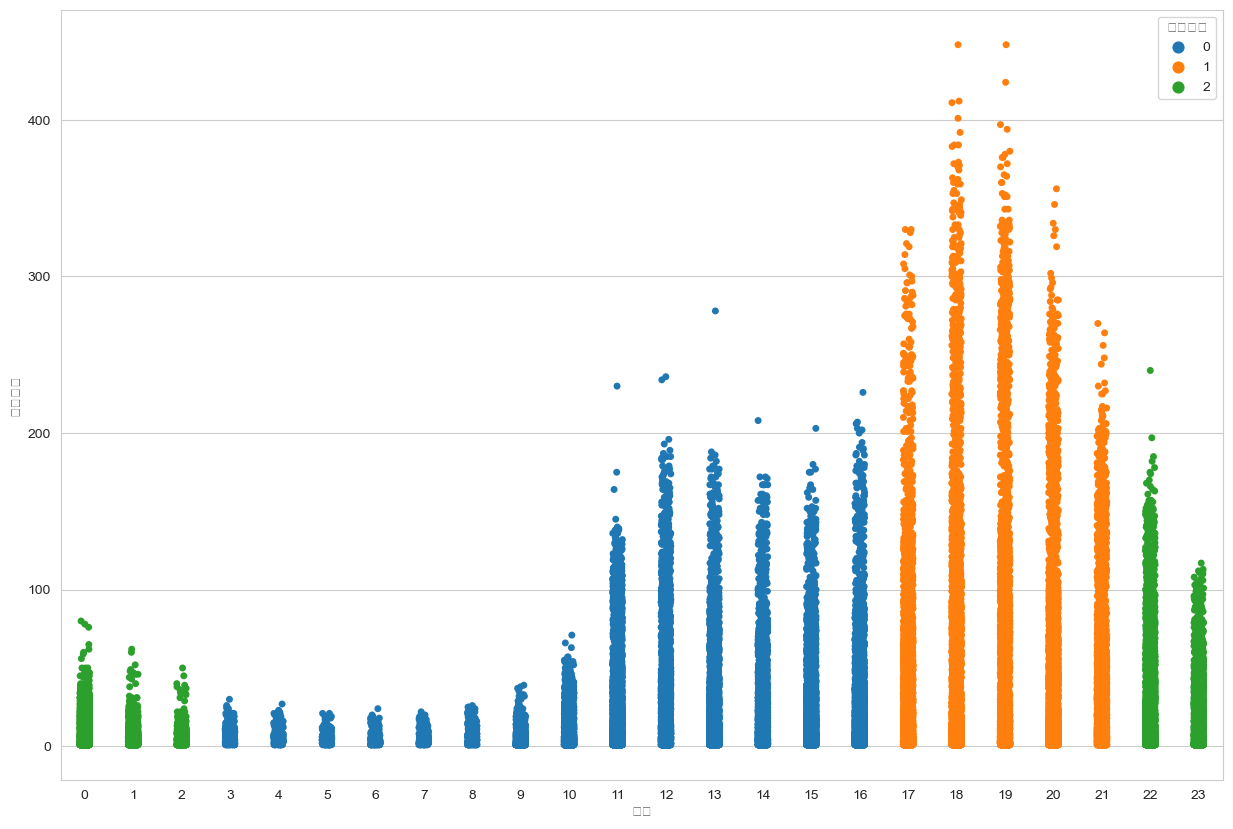

In [13]:
# 범주형 그래프로 그려보자

sns.set_style('whitegrid')
fig = plt.figure(figsize=(15,10))
sns.stripplot(x='시간', y='주문건수', hue='시간범주', data=df)

plt.show()

In [9]:
# 필요없는 컬럼 unnamed:0, 날짜, 시, 구, 5세단위구분, 남성인구수, 여성인구수 제거
data = df.copy()


data.drop(df.columns[[0,1,2,3,4,5,7,8,9,10,11,13]], axis=1, inplace=True)

data.columns


Index(['주문건수', '시간범주', '요일'], dtype='object')

In [44]:
data.to_excel('./data/delivery/회귀.xlsx')
display(df.head())
display(data.head())

,Unnamed: 0,날짜,시간,시,구,평균시간,주문건수,평균주문금액,5세단위구분,총인구수,남성인구수,여성인구수,시간범주,타임테이블,요일
0,0,2019-07-18,0,서울특별시,구로구,22.65,16,23679,20-24세,24384,12039,12345,2,2019-07-18,3
1,1,2019-07-18,1,서울특별시,구로구,28.09,6,19667,20-24세,24384,12039,12345,2,2019-07-18,3
2,2,2019-07-18,9,서울특별시,구로구,20.25,3,15167,20-24세,24384,12039,12345,0,2019-07-18,3
3,3,2019-07-18,10,서울특별시,구로구,21.37,21,14721,20-24세,24384,12039,12345,0,2019-07-18,3
4,4,2019-07-18,11,서울특별시,구로구,22.12,73,24563,20-24세,24384,12039,12345,0,2019-07-18,3


,주문건수,시간범주,요일
0,16,2,3
1,6,2,3
2,3,0,3
3,21,0,3
4,73,0,3


In [45]:
# 구간 분할 뒤 더미로 만들어봅시다
from sklearn import preprocessing

# 구간분할 준비 - 시간범주
count, bin_drivers = np.histogram(df['시간범주'], bins=3)

bin_names = ["일반", "저녁", "심야"]

df['구간분할'] = pd.cut(x=df['시간범주'],
                       bins = bin_drivers,
                       labels = bin_names,
                       include_lowest=True)

time_dummies = pd.get_dummies(df['구간분할'])

data = data.drop(data.columns[1], axis=1)
data = data.join(time_dummies) # 합치기!

display(data)

,주문건수,요일,일반,저녁,심야
0,16,3,0,0,1
1,6,3,0,0,1
2,3,3,1,0,0
3,21,3,1,0,0
4,73,3,1,0,0
...,...,...,...,...,...
55610,1,0,1,0,0
55611,3,0,1,0,0
55612,1,1,0,1,0
55613,1,1,0,0,1


In [46]:
# 구간 분할 뒤 더미로 만들어봅시다
from sklearn import preprocessing

# 구간분할 준비 - 요일범주
count, bin_drivers = np.histogram(df['요일'], bins=7)

bin_names = ["월", "화", "수", "목", "금" , "토", "일"]

df['구간분할'] = pd.cut(x=df['요일'],
                       bins = bin_drivers,
                       labels = bin_names,
                       include_lowest=True)

weekday_dummies = pd.get_dummies(df['구간분할'])

data = data.drop(data.columns[1], axis=1)
data = data.join(weekday_dummies) # 합치기!

display(data)

,주문건수,일반,저녁,심야,월,화,수,목,금,토,일
0,16,0,0,1,0,0,0,1,0,0,0
1,6,0,0,1,0,0,0,1,0,0,0
2,3,1,0,0,0,0,0,1,0,0,0
3,21,1,0,0,0,0,0,1,0,0,0
4,73,1,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
55610,1,1,0,0,1,0,0,0,0,0,0
55611,3,1,0,0,1,0,0,0,0,0,0
55612,1,0,1,0,0,1,0,0,0,0,0
55613,1,0,0,1,0,1,0,0,0,0,0


# 표준화파트

In [76]:
# pandas 형태로 정의된 데이터를 출력할 때, scientific-notation이 아닌 float 모양으로 출력
pd.options.mode.chained_assignment = None

In [101]:
# 피처 각각에 대한 scaling을 수행하는 함수를 정의
# 표준편차와 평균을 이용해 스케일링 (Z score)

def standard_scaling(df, scale_columns):
    for col in scale_columns:
        series_mean = df[col].mean()
        series_std = df[col].std()
        df[col] = df[col].apply(lambda x: (x-series_mean)/series_std)
    return df

In [102]:
# 피처 각각에 대한 scaling을 수행
scale_columns = ['평균시간', '평균주문금액', '총인구수']
standard_data = standard_scaling(data, scale_columns)

# 판다스 파이썬 회귀분석

In [114]:
X = standard_data[standard_data.columns.difference(['주문건수'])]
y = standard_data['주문건수']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5)

print("훈련 데이터 : ", X_train.shape)
print("검증 데이터 : ", X_test.shape)

훈련 데이터 :  (38930, 6)
검증 데이터 :  (16685, 6)


In [115]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(X_train,  y_train)

r_square = lr.score(X_test, y_test)

print(r_square)

0.20972447300496233


In [48]:
## 이거는 요일, 시간만 분석!

X = data[data.columns.difference(['주문건수'])]
y = data['주문건수']

print(X.columns)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5)

print("훈련 데이터 : ", X_train.shape)
print("검증 데이터 : ", X_test.shape)

from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(X_train,  y_train)

r_square = lr.score(X_test, y_test)

print(r_square)

Index(['금', '목', '수', '심야', '월', '일', '일반', '저녁', '토', '화'], dtype='object')


AttributeError: 'Series' object has no attribute 'columns'

# 머신러닝 회귀분석

In [109]:
# from sklearn import linear_model
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import mean_squared_error
# from math import sqrt

# # 학습 데이터와 테스트 데이터로 분리
# X = standard_data[standard_data.columns.difference(['주문건수'])]
# y = standard_data['주문건수']
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=19)

In [110]:
# # 회귀 분석 모델을 학습
# lr = linear_model.LinearRegression()
# model = lr.fit(X_train, y_train)

In [111]:
# # 회귀 분석 모델을 평가
# print(model.score(X_train, y_train)) # train R2 score를 출력합니다.
# print(model.score(X_test, y_test)) # test R2 score를 출력합니다.

In [112]:
# # 회귀 분석 모델을 평가
# y_predictions = lr.predict(X_train)
# print(sqrt(mean_squared_error(y_train, y_predictions))) # train RMSE score를 출력합니다.
# y_predictions = lr.predict(X_test)
# print(sqrt(mean_squared_error(y_test, y_predictions))) # test RMSE score를 출력합니다.

# # 차이의 제곱 값이 RMSE

In [113]:
# # 독립변수들 간의 공선성 파악

# import seaborn as sns
# from matplotlib import font_manager, rc
# font_path = "./data/malgun.ttf"
# font_name = font_manager.FontProperties(fname=font_path).get_name()
# rc('font', family=font_name)

# # 피처간의 상관계수 행렬을 계산
# corr = standard_data[scale_columns].corr(method='pearson')
# show_cols = ['avg_time', 'avg_pay', 'all_ppl']

# # corr 행렬 히트맵을 시각화
# # plt.rc('font', family='malgun')
# sns.set(font_scale=1.5)
# hm = sns.heatmap(corr.values,
#             cbar=True,
#             annot=True, 
#             square=True,
#             fmt='.2f',
#             annot_kws={'size': 15},
#             yticklabels=show_cols,
#             xticklabels=show_cols)

# plt.tight_layout()
# plt.show()